<a href="https://colab.research.google.com/github/Kimjibeom/LSTM/blob/main/LSTM_%EB%85%BC%EB%AC%B8%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split 
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import os
import json
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from pymongo import MongoClient
from dateutil import parser
from datetime import datetime, timedelta
# import lstm, time #도움을 주는 라이브러리들

In [2]:
conn = MongoClient("DB 연결: 포트")
db = conn.get_database("traffic_Sejong_road")

In [3]:
coll_list = db.list_collection_names()
print(coll_list)

['df_s']


In [4]:
a=[]   # 갈매로
b=[]   # 당산로
c=[]   # 산학리길
d=[]   # 새내로
e=[]   # 시목부강로
f=[]   # 시청대로
g=[]   # 연청로
h=[]   # 용연로
u=[]   # 일반국도36호선
k=[]   # 절재로
l=[]   # 정안세종로
m=[]   # 조치원로
n=[]   # 지방도604호선
o=[]   # 지방도96호선
p=[]   # 청연로
q=[]   # 충현로
r=[]   # 평기길
s=[]   # 한누리대로

In [5]:
for i in coll_list:
    tmp_col = db.get_collection(i)
    for j in tmp_col.find().limit(2500):
        '''
        if j['도로명'] == '갈매로':
              a.append(j)
        if j['도로명'] == '당산로':
              b.append(j)
        if j['도로명'] == '산학리길':
              c.append(j)
        if j['도로명'] == '새내로':
              d.append(j)
        if j['도로명'] == '시목부강로':
              e.append(j)
        if j['도로명'] == '시청대로':
              f.append(j)
        if j['도로명'] == '연청로':
              g.append(j)                    
        if j['도로명'] == '용연로':
              h.append(j)
        if j['도로명'] == '일반국도36호선':
              u.append(j)
        if j['도로명'] == '절재로':
              k.append(j)
        if j['도로명'] == '정안세종로':
              l.append(j)
        if j['도로명'] == '조치원로':
              m.append(j)
        if j['도로명'] == '지방도604호선':
              n.append(j)
        if j['도로명'] == '지방도96호선':
              o.append(j)
        if j['도로명'] == '청연로':
              p.append(j)
        if j['도로명'] == '충현로':
              q.append(j)
        if j['도로명'] == '평기길':
              r.append(j)
       if j['도로명'] == '한누리대로':
             s.append(j)
             '''
        if j['s_1점유율']:
              s.append(j)

In [6]:
df_s = pd.DataFrame(list(s))

In [7]:
print(df_s)

                           _id s_1도로총교통량 s_1평균통행속도  ... s_12평균통행속도   s_12점유율 휴일
0     616bfecbfed079d5b1863e39       210        56  ...      63.75    1.6225  1
1     616bfecbfed079d5b1863e3a       250        54  ...     64.375    1.8925  1
2     616bfecbfed079d5b1863e3b       135    54.375  ...      66.75    1.7525  1
3     616bfecbfed079d5b1863e3c        83     56.75  ...     71.375   1.60625  1
4     616bfecbfed079d5b1863e3d        91    60.375  ...         68   1.76625  1
...                        ...       ...       ...  ...        ...       ... ..
2495  616bfeccfed079d5b18647f8       230     57.75  ...     65.375   2.27375  1
2496  616bfeccfed079d5b18647f9       157        57  ...      71.25   1.59875  0
2497  616bfeccfed079d5b18647fa        88      54.5  ...      66.75   1.53125  0
2498  616bfeccfed079d5b18647fb        46    55.875  ...      67.25     1.555  0
2499  616bfeccfed079d5b18647fc        35     57.75  ...         68  1.442857  0

[2500 rows x 38 columns]


In [8]:
data=pd.DataFrame(df_s)
data=data.drop(['_id'],axis=1)
# print(data)

In [9]:
data.astype('float')

,s_1도로총교통량,s_1평균통행속도,s_1점유율,s_2도로총교통량,s_2평균통행속도,s_2점유율,s_3도로총교통량,s_3평균통행속도,s_3점유율,s_4도로총교통량,s_4평균통행속도,s_4점유율,s_5도로총교통량,s_5평균통행속도,s_5점유율,s_6도로총교통량,s_6평균통행속도,s_6점유율,s_7도로총교통량,s_7평균통행속도,s_7점유율,s_8도로총교통량,s_8평균통행속도,s_8점유율,s_9도로총교통량,s_9평균통행속도,s_9점유율,s_10도로총교통량,s_10평균통행속도,s_10점유율,s_11도로총교통량,s_11평균통행속도,s_11점유율,s_12도로총교통량,s_12평균통행속도,s_12점유율,휴일
0,210.0,56.000,2.41625,175.0,55.625,3.00375,189.0,53.500,3.84250,216.0,53.5000,3.381250,232.0,59.250,3.14250,220.0,51.625,3.453750,23.0,65.8571,1.528571,14.0,75.2857,1.391429,229.0,56.3750,2.766250,259.0,53.3750,3.676250,93.0,62.6250,2.346250,60.0,63.750,1.622500,1.0
1,250.0,54.000,3.04625,183.0,56.375,2.90500,167.0,59.250,2.20875,136.0,58.3750,2.601250,194.0,60.875,2.77500,177.0,48.000,3.550000,28.0,62.5000,1.382500,13.0,60.2857,1.342857,162.0,57.3750,2.187500,176.0,55.2500,2.983750,114.0,63.0000,2.616250,59.0,64.375,1.892500,1.0
2,135.0,54.375,2.33750,104.0,59.750,2.03875,83.0,61.625,1.94750,87.0,56.8750,2.416250,86.0,64.625,1.95000,101.0,58.375,2.675000,19.0,64.4286,1.232857,12.0,60.6250,1.480000,74.0,55.6250,1.810000,114.0,56.5000,2.622500,64.0,64.7500,2.010000,48.0,66.750,1.752500,1.0
3,83.0,56.750,1.97125,70.0,61.250,1.99000,66.0,61.375,2.23125,77.0,59.3750,2.317500,67.0,64.625,1.86000,74.0,60.250,2.038750,13.0,75.1250,1.221250,8.0,53.6000,1.854000,65.0,60.0000,1.776250,69.0,59.5000,2.133750,35.0,65.1250,1.946250,37.0,71.375,1.606250,1.0
4,91.0,60.375,1.85750,80.0,64.500,1.91125,48.0,60.250,1.96250,61.0,59.5000,1.858750,58.0,63.750,1.85125,87.0,57.875,2.053750,16.0,62.2000,1.472000,9.0,72.7143,1.545714,59.0,58.7500,1.762500,63.0,60.5000,2.196250,32.0,64.3750,1.765000,47.0,68.000,1.766250,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,230.0,57.750,2.82125,158.0,59.625,2.59625,176.0,56.000,2.90625,197.0,59.6250,2.732500,176.0,59.125,2.86625,250.0,58.000,3.188750,37.0,67.1250,1.562500,39.0,63.8750,1.733750,150.0,55.2500,2.331250,214.0,55.3750,3.438750,189.0,65.0000,3.531250,72.0,65.375,2.273750,1.0
2496,157.0,57.000,2.44250,87.0,63.625,2.10125,102.0,57.500,2.72625,128.0,60.6250,2.443750,138.0,60.875,2.22875,156.0,54.875,2.615000,30.0,59.7500,1.756250,31.0,64.0000,1.287143,121.0,58.1250,2.113750,144.0,58.0000,2.902500,103.0,64.7500,2.517500,45.0,71.250,1.598750,0.0
2497,88.0,54.500,2.18750,57.0,62.625,1.87875,57.0,60.375,2.01125,76.0,64.0000,1.900000,72.0,61.375,2.04625,85.0,57.250,2.596250,14.0,67.2857,1.452857,7.0,62.0000,1.527500,57.0,55.6250,1.757500,86.0,55.3750,2.518750,31.0,67.8750,1.516250,25.0,66.750,1.531250,0.0
2498,46.0,55.875,1.73500,35.0,60.125,1.59250,34.0,64.250,1.72000,34.0,58.1429,1.464286,29.0,63.125,1.76625,32.0,63.000,1.594286,9.0,53.3333,1.781667,11.0,54.3333,1.781667,28.0,52.0000,1.955000,26.0,55.5714,2.572857,22.0,71.7143,1.452857,18.0,67.250,1.555000,0.0


In [10]:
# Normalization - 정규화
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_clos = ['s_1도로총교통량','s_1평균통행속도','s_1점유율',
             's_2도로총교통량','s_2평균통행속도','s_2점유율',
             's_3도로총교통량','s_3평균통행속도','s_3점유율',
             's_4도로총교통량','s_4평균통행속도','s_4점유율',
             's_5도로총교통량','s_5평균통행속도','s_5점유율',
             's_6도로총교통량','s_6평균통행속도','s_6점유율',
             's_7도로총교통량','s_7평균통행속도','s_7점유율',
             's_8도로총교통량','s_8평균통행속도','s_8점유율',
             's_9도로총교통량','s_9평균통행속도','s_9점유율',
             's_10도로총교통량','s_10평균통행속도','s_10점유율',
             's_11도로총교통량','s_11평균통행속도','s_11점유율',
             's_12도로총교통량','s_12평균통행속도','s_12점유율',]
df_scaled = scaler.fit_transform(data[scale_clos])

df_scaled = pd.DataFrame(data=df_scaled,columns=scale_clos)

train = df_scaled[:1900] # 학습 데이터
test = df_scaled[1900:] # 테스트 데이터

In [11]:
# 학습 시킬 데이터 셋 생성 함수
# 5시간 기반으로 데이터 셋 묶기
def make_dataset(data,label,window_size=5):
    feature_list =[] # 학습
    label_list =[] # 답
    for i in range(len(data)-window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list),np.array(label_list)
# 한누리대로 
feature_cols = ['s_1도로총교통량','s_1평균통행속도','s_1점유율',
             's_2도로총교통량','s_2평균통행속도','s_2점유율',
             's_3도로총교통량','s_3평균통행속도','s_3점유율',
             's_4도로총교통량','s_4평균통행속도','s_4점유율',
             's_5도로총교통량','s_5평균통행속도','s_5점유율',
             's_6도로총교통량','s_6평균통행속도','s_6점유율',
             's_7도로총교통량','s_7평균통행속도','s_7점유율',
             's_8도로총교통량','s_8평균통행속도','s_8점유율',
             's_9도로총교통량','s_9평균통행속도','s_9점유율',
             's_10도로총교통량','s_10평균통행속도','s_10점유율',
             's_11도로총교통량','s_11평균통행속도','s_11점유율',
             's_12도로총교통량','s_12평균통행속도','s_12점유율'] # 학습 컬럼
label_cols = ['s_12점유율'] # 답 컬럼

train_feature = train[feature_cols]
train_label = train[label_cols]

# train dataset
train_feature,train_label = make_dataset(train_feature,train_label,5)

# train,test set 생성
X_train,X_test,y_train,y_test = \
train_test_split(train_feature,train_label,test_size=0.8,shuffle=False)

test_feature = test[feature_cols]
test_label = test[label_cols]

# test dataset(실제 예측 데이터)
test_feature,test_label = make_dataset(test_feature,test_label,5)

In [12]:
model = models.Sequential()
model.add(
        layers.LSTM(32,            # 노드 개수
        input_shape=(X_train.shape[1],X_train.shape[2]),# input_dim 입력 데이터의 피쳐 개수
        activation='relu', # 모델을 활성화 함수 선형-> 비선형
        return_sequences = True)
        )
model.add(
        layers.LSTM(32,activation='relu')
        )

model.add(
        layers.Dense(10)
        ) # 예측하고자하는 target이 1시간 ~ 10시간뒤 (output)
    
model.summary()
model.compile(loss='mse',optimizer='adam',metrics=['acc'])
callbacks = [ModelCheckpoint(filepath='./chk_point/a.chk', save_freq='epoch')]
model.fit(X_train,y_train,epochs=100,batch_size=32
               ,validation_data=(X_test,y_test)
               ,callbacks=callbacks
               ,shuffle = False
      )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 32)             8832      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 10)                330       
Total params: 17,482
Trainable params: 17,482
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 3s 47ms/step - loss: 0.2000 - acc: 0.0000e+00 - val_loss: 0.1360 - val_acc: 0.0000e+00
INFO:tensorflow:Assets written to: ./chk_point/a.chk/assets
Epoch 2/100
12/12 [==============================] - 0s 12ms/step - loss: 0.1098 - acc: 0.0000e+00 - val_loss: 0.0784 - val_acc: 0.0000e+00
INFO:tensorflow:Assets written to: ./chk_p

In [13]:
# 예측
pred =model.predict(test_feature)

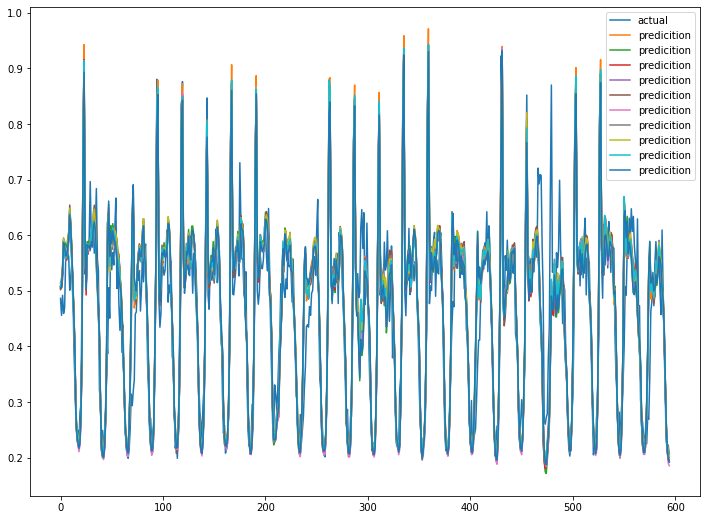

In [14]:
# 시각화
plt.figure(figsize=(12,9))
plt.plot(test_label,label='actual') # 실제
plt.plot(pred,label='predicition') # 예측
plt.legend()
plt.show()